# Обработка данных

Tasks:
1) Объяснить почему мы удалили movie_id
2) Сократить код с помощью списков и .astype()
3) будние и выходные позаменять на 0 и 1
4) сделать постояшек

In [343]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import datetime as dt
from sklearn.neural_network import MLPRegressor 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [83]:
data = pd.read_csv("cinema_successful_orders.csv", encoding = "utf-8", sep=';', comment='#')

In [84]:
data = data.dropna()

## Названия

In [85]:
def striptiz(text):
    return text.strip()

data.movie_name = data.movie_name.apply(striptiz)

In [86]:
f = open('gavno.txt', encoding = "utf-8")
stroki = [i.rstrip() for i in f.readlines()]
data = data[~data.movie_name.isin(stroki)]

In [87]:
def manual_processing(text):
    if text == "(НЕ)идеальный мужчина":
        return "(Не)идеальный мужчина"
    elif text == "Playmobil Фильм: Через вселенные":
        return "Playmobil фильм: Через вселенные"
    elif text == "Генерал Де Голль":
        return "Генерал де Голль"
    elif text == "Голос луны":
        return "Голос Луны"
    elif text == "Жан Поль Готье, с любовью":
        return "Жан-Поль Готье, с любовью"
    elif text == "Звездные войны: Скайуокер. Восход":
        return "Звёздные Войны: Скайуокер. Восход"
    elif text == "Зеленая книга":
        return "Зелёная книга"
    elif text == "Игры с огнем":
        return "Игры с огнём"
    elif text == "Иди к Папочке":
        return "Иди к папочке"
    elif text == "HUMAN LOST: Исповедь неполноценного человека":
        return "Human Lost: Исповедь неполноценного человека"
    elif text == "Волшебное зеркало, или двойные неприятности":
        return "Волшебное зеркало или двойные неприятности"
    elif text == "Маленькая Мисс Дулиттл":
        return "Маленькая мисс Дулиттл"
    elif text == "Марафон Желаний":
        return "Марафон желаний"
    elif text == "Моя собака Идиот":
        return "Моя собака идиот"
    elif text == "Навсикая из Долины ветров":
        return "Навсикая из долины ветров"
    elif text == "Неизвестная Италия. Матера — город из камня":
        return "Неизвестная Италия. Матера – город из камня"
    elif text == "Никогда редко иногда всегда":
        return "Никогда, редко, иногда, всегда"
    elif text == "Ночь пожирателей рекламы 2020":
        return "Ночь пожирателей рекламы-2020"
    elif text == "Отель Белград":
        return "Отель «Белград»"
    elif text == "Петсон и Финдус 2. Лучшее на свете Рождество":
        return "Петсон и Финдус-2: Лучшее на свете Рождество"
    elif text == "Петсон и Финдус. Финдус переезжает":
        return "Петсон и Финдус: Финдус переезжает"
    elif text == "Пингвиненок Пороро: Пираты Острова сокровищ":
        return "Пингвиненок Пороро: Пираты острова сокровищ"
    elif text == "Поезд в Пусан 2: Полуостров":
        return "Поезд в Пусан-2: Полуостров"
    elif text == "Полицейский с Рублевки. Новогодний Беспредел 2":
        return "Полицейский с Рублевки. Новогодний беспредел 2"
    elif text == "Прыг Скок в поисках сокровищ":
        return "Прыг-скок: В поисках сокровищ"
    elif text == "Сделано в Италии.":
        return "Сделано в Италии"
    elif text == "Сказки Серого волка":
        return "Сказки Серого Волка"
    elif text == "Спайс бойз":
        return "Спайс Бойз"
    elif text == "Спасти Панду":
        return "Спасти панду"
    elif text == "Супер крейзи":
        return "Супер Крейзи"
    elif text == "Тролль: История с хвостом":
        return "Тролль: история с хвостом"
    elif text == "Туннель: Опасно для жизни":
        return "Туннель: опасно для жизни"
    elif text == "Удивительное путешествие Доктора Дулиттла":
        return "Удивительное путешествие доктора Дулиттла"
    elif text == "Унесенные призраками":
        return "Унесённые призраками"
    elif text == "Фрида. Да здравствует жизнь!":
        return "Фрида: Да здравствует жизнь!"
    elif text == "Холодное сердце 2":
        return "Холодное сердце-2"
    elif text == "Чёрное Рождество":
        return "Чёрное рождество"
    elif text == "Щенячий патруль: Скорей спешим на помощь":
        return "Щенячий патруль: Скорей спешим на помощь!"
    elif text == "Яга. Кошмар темного леса":
        return "Яга. Кошмар тёмного леса"
    elif text == "Лето 85-го":
        return "Лето'85"
    elif text == "Пиноккио (2020)":
        return "Пиноккио"
    elif text == "Рюити Сакамото: async в Park Avenue Armory":
        return "Рюити Сакамото: async Live в Park Avenue Armory"
    elif text == "Паразиты (чёрно-белая версия)":
        return "Паразиты"
    elif text == "Поезд в Пусан (расширенная версия)":
        return "Поезд в Пусан"
    else:
        return text
    
data.movie_name = data.movie_name.apply(manual_processing)

In [88]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(data.groupby(['movie_name']).movie_rating.max().sort_values())

## movie_rating

In [89]:
new_data = data.groupby('movie_name').movie_rating.max()
data = data.drop(columns = ['movie_rating'], axis = 1)
data_clear = data.merge(new_data, how='outer', on = 'movie_name')

In [656]:
data_clear = data_clear[data_clear.movie_rating != '0,0']
data_clear.info()
# dirty_data = data_clear[(data_clear['genre_is_triller'] == '0,0') & (data_clear['genre_is_military'] == '0,0') & (data_clear['genre_is_action'] == '0,0') & (data_clear['genre_is_biographical'] == '0,0') &(data_clear['genre_is_fairy_tale'] == '0,0') &(data_clear['genre_is_science'] == '0,0') &(data_clear['genre_is_fantasy'] == '0,0') &(data_clear['genre_is_historical'] == '0,0') &(data_clear['genre_is_drama'] == '0,0') &(data_clear['genre_is_animation'] == '0,0') &(data_clear['genre_is_cartoon'] == '0,0') &(data_clear['genre_is_documentary'] == '0,0') &(data_clear['genre_is_adventure'] == '0,0') &(data_clear['genre_is_fiction'] == '0,0') &(data_clear['genre_is_childish'] == '0,0') &(data_clear['genre_is_horror'] == '0,0') &(data_clear['genre_is_humor'] == '0,0') &(data_clear['genre_is_western'] == '0,0') &(data_clear['genre_is_noir'] == '0,0') &(data_clear['genre_is_detective'] == '0,0') &(data_clear['genre_is_biography'] == '0,0') &(data_clear['genre_is_criminal'] == '0,0') &(data_clear['genre_is_tragicomedy'] == '0,0') &(data_clear['genre_is_biopic'] == '0,0') &(data_clear['genre_is_mystic'] == '0,0') &(data_clear['genre_is_family'] == '0,0') &(data_clear['genre_is_comedy'] == '0,0') & (data_clear['genre_is_arthouse'] == '0,0')]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 484026 entries, 0 to 512571
Data columns (total 43 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   order_id               484026 non-null  int64  
 1   creation_date          484026 non-null  object 
 2   session_date           484026 non-null  int64  
 3   movie_id               484026 non-null  int64  
 4   movie_name             484026 non-null  object 
 5   movie_duration         484026 non-null  int32  
 6   movie_age_restriction  484026 non-null  int64  
 7   number_of_tickets      484026 non-null  float64
 8   places                 484026 non-null  object 
 9   sales_in_cu            484026 non-null  float64
 10  ticket_price_in_cu     484026 non-null  float64
 11  cinema_name            484026 non-null  object 
 12  cinema_address         484026 non-null  object 
 13  cinema_latitude        484026 non-null  float64
 14  cinema_longitude       484026 non-nu

In [91]:
data_clear['movie_rating'] = data_clear['movie_rating'].replace(',', '.', regex=True)

In [92]:
data_clear['movie_rating'] = data_clear['movie_rating'].astype(float)

## genres

In [93]:
genres = data_clear.groupby('movie_name').genre_is_triller.max()
genres = genres.to_frame()
genres = genres.merge(data_clear.groupby('movie_name').genre_is_military.max(), how='outer', on = 'movie_name')
genres = genres.merge(data_clear.groupby('movie_name').genre_is_action.max(), how='outer', on = 'movie_name')
genres = genres.merge(data_clear.groupby('movie_name').genre_is_biographical.max(), how='outer', on = 'movie_name')
genres = genres.merge(data_clear.groupby('movie_name').genre_is_fairy_tale.max(), how='outer', on = 'movie_name')
genres = genres.merge(data_clear.groupby('movie_name').genre_is_science.max(), how='outer', on = 'movie_name')
genres = genres.merge(data_clear.groupby('movie_name').genre_is_fantasy.max(), how='outer', on = 'movie_name')
genres = genres.merge(data_clear.groupby('movie_name').genre_is_historical.max(), how='outer', on = 'movie_name')
genres = genres.merge(data_clear.groupby('movie_name').genre_is_drama.max(), how='outer', on = 'movie_name')
genres = genres.merge(data_clear.groupby('movie_name').genre_is_animation.max(), how='outer', on = 'movie_name')
genres = genres.merge(data_clear.groupby('movie_name').genre_is_cartoon.max(), how='outer', on = 'movie_name')
genres = genres.merge(data_clear.groupby('movie_name').genre_is_documentary.max(), how='outer', on = 'movie_name')
genres = genres.merge(data_clear.groupby('movie_name').genre_is_adventure.max(), how='outer', on = 'movie_name')
genres = genres.merge(data_clear.groupby('movie_name').genre_is_fiction.max(), how='outer', on = 'movie_name')
genres = genres.merge(data_clear.groupby('movie_name').genre_is_childish.max(), how='outer', on = 'movie_name')
genres = genres.merge(data_clear.groupby('movie_name').genre_is_horror.max(), how='outer', on = 'movie_name')
genres = genres.merge(data_clear.groupby('movie_name').genre_is_humor.max(), how='outer', on = 'movie_name')
genres = genres.merge(data_clear.groupby('movie_name').genre_is_western.max(), how='outer', on = 'movie_name')
genres = genres.merge(data_clear.groupby('movie_name').genre_is_noir.max(), how='outer', on = 'movie_name')
genres = genres.merge(data_clear.groupby('movie_name').genre_is_detective.max(), how='outer', on = 'movie_name')
genres = genres.merge(data_clear.groupby('movie_name').genre_is_biography.max(), how='outer', on = 'movie_name')
genres = genres.merge(data_clear.groupby('movie_name').genre_is_criminal.max(), how='outer', on = 'movie_name')
genres = genres.merge(data_clear.groupby('movie_name').genre_is_tragicomedy.max(), how='outer', on = 'movie_name')
genres = genres.merge(data_clear.groupby('movie_name').genre_is_biopic.max(), how='outer', on = 'movie_name')
genres = genres.merge(data_clear.groupby('movie_name').genre_is_mystic.max(), how='outer', on = 'movie_name')
genres = genres.merge(data_clear.groupby('movie_name').genre_is_family.max(), how='outer', on = 'movie_name')
genres = genres.merge(data_clear.groupby('movie_name').genre_is_comedy.max(), how='outer', on = 'movie_name')
genres = genres.merge(data_clear.groupby('movie_name').genre_is_arthouse.max(), how='outer', on = 'movie_name')

In [94]:
def intovka(n):
    n = n.replace(",", ".")
    return float(n)

In [95]:
genres.genre_is_action = genres.genre_is_action.apply(intovka)
genres.genre_is_adventure = genres.genre_is_adventure.apply(intovka)
genres.genre_is_animation = genres.genre_is_animation.apply(intovka)
genres.genre_is_arthouse = genres.genre_is_arthouse.apply(intovka)
genres.genre_is_biographical = genres.genre_is_biographical.apply(intovka)
genres.genre_is_biography = genres.genre_is_biography.apply(intovka)
genres.genre_is_biopic = genres.genre_is_biopic.apply(intovka)
genres.genre_is_cartoon = genres.genre_is_cartoon.apply(intovka)
genres.genre_is_childish = genres.genre_is_childish.apply(intovka)
genres.genre_is_comedy = genres.genre_is_comedy.apply(intovka)
genres.genre_is_criminal = genres.genre_is_criminal.apply(intovka)
genres.genre_is_detective = genres.genre_is_detective.apply(intovka)
genres.genre_is_documentary = genres.genre_is_documentary.apply(intovka)
genres.genre_is_drama = genres.genre_is_drama.apply(intovka)
genres.genre_is_fairy_tale = genres.genre_is_fairy_tale.apply(intovka)
genres.genre_is_family = genres.genre_is_family.apply(intovka)
genres.genre_is_fantasy = genres.genre_is_fantasy.apply(intovka)
genres.genre_is_fiction = genres.genre_is_fiction.apply(intovka)
genres.genre_is_historical = genres.genre_is_historical.apply(intovka)
genres.genre_is_horror = genres.genre_is_horror.apply(intovka)
genres.genre_is_humor = genres.genre_is_humor.apply(intovka)
genres.genre_is_military = genres.genre_is_military.apply(intovka)
genres.genre_is_mystic = genres.genre_is_mystic.apply(intovka)
genres.genre_is_noir = genres.genre_is_noir.apply(intovka)
genres.genre_is_science = genres.genre_is_science.apply(intovka)
genres.genre_is_tragicomedy = genres.genre_is_tragicomedy.apply(intovka)
genres.genre_is_triller = genres.genre_is_triller.apply(intovka)
genres.genre_is_western = genres.genre_is_western.apply(intovka)

In [96]:
genres = genres.assign(count_of_genres = genres.genre_is_action + 
                       genres.genre_is_adventure + 
                       genres.genre_is_animation + 
                       genres.genre_is_arthouse + 
                       genres.genre_is_biographical + 
                       genres.genre_is_biography + 
                       genres.genre_is_biopic + 
                       genres.genre_is_cartoon + 
                       genres.genre_is_childish + 
                       genres.genre_is_comedy + 
                       genres.genre_is_criminal + 
                       genres.genre_is_detective + 
                       genres.genre_is_documentary + 
                       genres.genre_is_drama + 
                       genres.genre_is_fairy_tale + 
                       genres.genre_is_family + 
                       genres.genre_is_fantasy + 
                       genres.genre_is_fiction + 
                       genres.genre_is_historical + 
                       genres.genre_is_horror + 
                       genres.genre_is_humor + 
                       genres.genre_is_military + 
                       genres.genre_is_mystic + 
                       genres.genre_is_noir + 
                       genres.genre_is_science + 
                       genres.genre_is_tragicomedy + 
                       genres.genre_is_triller + 
                       genres.genre_is_western)

In [97]:
data_clear = data_clear.drop(columns = ['genre_is_triller',
       'genre_is_military', 'genre_is_action', 'genre_is_biographical',
       'genre_is_fairy_tale', 'genre_is_science', 'genre_is_fantasy',
       'genre_is_historical', 'genre_is_drama', 'genre_is_animation',
       'genre_is_cartoon', 'genre_is_documentary', 'genre_is_adventure',
       'genre_is_fiction', 'genre_is_childish', 'genre_is_horror',
       'genre_is_humor', 'genre_is_western', 'genre_is_noir',
       'genre_is_detective', 'genre_is_biography', 'genre_is_criminal',
       'genre_is_tragicomedy', 'genre_is_biopic', 'genre_is_mystic',
       'genre_is_family', 'genre_is_comedy', 'genre_is_arthouse'], axis = 1)

In [98]:
data_clear = data_clear.merge(genres, how='outer', on = 'movie_name')

In [660]:
data_clear = data_clear[~((data_clear['genre_is_triller'] == 0.0) & (data_clear['genre_is_military'] == 0.0) & (data_clear['genre_is_action'] == 0.0) & (data_clear['genre_is_biographical'] == 0.0) &(data_clear['genre_is_fairy_tale'] == 0.0) &(data_clear['genre_is_science'] == 0.0) &(data_clear['genre_is_fantasy'] == 0.0) &(data_clear['genre_is_historical'] == 0.0) &(data_clear['genre_is_drama'] == 0.0) &(data_clear['genre_is_animation'] == 0.0) &(data_clear['genre_is_cartoon'] == 0.0) &(data_clear['genre_is_documentary'] == 0.0) &(data_clear['genre_is_adventure'] == 0.0) &(data_clear['genre_is_fiction'] == 0.0) &(data_clear['genre_is_childish'] == 0.0) &(data_clear['genre_is_horror'] == 0.0) &(data_clear['genre_is_humor'] == 0.0) &(data_clear['genre_is_western'] == 0.0) &(data_clear['genre_is_noir'] == 0.0) &(data_clear['genre_is_detective'] == 0.0) &(data_clear['genre_is_biography'] == 0.0) &(data_clear['genre_is_criminal'] == 0.0) &(data_clear['genre_is_tragicomedy'] == 0.0) &(data_clear['genre_is_biopic'] == 0.0) &(data_clear['genre_is_mystic'] == 0.0) &(data_clear['genre_is_family'] == 0.0) &(data_clear['genre_is_comedy'] == 0.0) & (data_clear['genre_is_arthouse'] == 0.0))]


KeyError: 'genre_is_fairy_tale'

In [661]:
data_clear['cinema_city']

0                  Москва
1                  Москва
2                  Лесной
3         Санкт-Петербург
4                  Москва
               ...       
512567             Москва
512568        Новосибирск
512569             Москва
512570             Москва
512571             Москва
Name: cinema_city, Length: 484026, dtype: object

In [100]:
data_clear

,order_id,creation_date,session_date,movie_id,movie_name,movie_duration,movie_age_restriction,number_of_tickets,places,sales_in_cu,...,genre_is_detective,genre_is_biography,genre_is_criminal,genre_is_tragicomedy,genre_is_biopic,genre_is_mystic,genre_is_family,genre_is_comedy,genre_is_arthouse,count_of_genres
0,2441412,2020-03-07,2020-03-07,32452,Маленькие женщины,135,12+,2.0,"ряд 5, место 6, ряд 5, место 5","63,29113924050633",...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,2169133,2020-02-03,2020-02-04,32452,Маленькие женщины,135,12+,4.0,"ряд 15, место 31, ряд 15, место 32, ряд 15, ме...","189,873417721519",...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
2,2187694,2020-02-06,2020-02-06,32452,Маленькие женщины,135,12+,2.0,"ряд 8, место 8, ряд 8, место 9","47,46835443037975",...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,2182225,2020-02-05,2020-02-05,32452,Маленькие женщины,135,12+,2.0,"ряд 8, место 6, ряд 8, место 5","47,46835443037975",...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
4,2209967,2020-02-08,2020-02-12,32452,Маленькие женщины,135,12+,3.0,"ряд 5, место 13, ряд 5, место 12, ряд 5, место 11","132,91139240506328",...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512567,2523437,2020-08-03,2020-08-12,48426,Крестон,73,18+,2.0,"ряд 7, место 15, ряд 7, место 14","142,40506329113924",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
512568,2661648,2020-10-03,2020-10-04,41491,N.I.C.E. Мы будем юными и прекрасными,92,16+,2.0,"ряд 10, место 11, ряд 10, место 12","110,75949367088607",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
512569,2537917,2020-08-22,2020-08-22,49547,«ДОКер 2020»: Роболав,76,16+,1.0,"ряд 7, место 14","63,29113924050633",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
512570,2530078,2020-08-12,2020-08-22,49547,«ДОКер 2020»: Роболав,76,16+,2.0,"ряд 12, место 1, ряд 12, место 2","126,58227848101266",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [51]:
# Сокращение кода с помощью списков
# ganry - список жанров

# for genre in ganry:
#     genres = genres.merge(data_clear.groupby('movie_name').genre.max(), how='outer', on = 'movie_name')
#     genres.genre = genres.genre.apply(intovka)
#     genres = genres.assign(F += genres.genre)

In [65]:
ganry = ['genre_is_triller',
       'genre_is_military', 'genre_is_action', 'genre_is_biographical',
       'genre_is_fairy_tale', 'genre_is_science', 'genre_is_fantasy',
       'genre_is_historical', 'genre_is_drama', 'genre_is_animation',
       'genre_is_cartoon', 'genre_is_documentary', 'genre_is_adventure',
       'genre_is_fiction', 'genre_is_childish', 'genre_is_horror',
       'genre_is_humor', 'genre_is_western', 'genre_is_noir',
       'genre_is_detective', 'genre_is_biography', 'genre_is_criminal',
       'genre_is_tragicomedy', 'genre_is_biopic', 'genre_is_mystic',
       'genre_is_family', 'genre_is_comedy', 'genre_is_arthouse']

In [101]:
data_clear = data_clear.drop(columns=['genre_is_fairy_tale', 'genre_is_animation', 'genre_is_humor', 'genre_is_science']) 

## dates

In [233]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(data_clear.value_counts('session_date'))

In [234]:
# l = [int(i) for i in '2020-10-07'.split("-")]
# date = dt.datetime(l[0], l[1], l[2])
# date.isoweekday()

In [102]:
def date(d):
    l = [int(i) for i in d.split("-")]
    date = dt.datetime(l[0], l[1], l[2])
    if date.isoweekday() <= 5:
        return 0 # будний
    else:
        return 1 # выходной

In [103]:
data_clear.session_date = data_clear.session_date.apply(date)

In [104]:
data_clear

,order_id,creation_date,session_date,movie_id,movie_name,movie_duration,movie_age_restriction,number_of_tickets,places,sales_in_cu,...,genre_is_detective,genre_is_biography,genre_is_criminal,genre_is_tragicomedy,genre_is_biopic,genre_is_mystic,genre_is_family,genre_is_comedy,genre_is_arthouse,count_of_genres
0,2441412,2020-03-07,1,32452,Маленькие женщины,135,12+,2.0,"ряд 5, место 6, ряд 5, место 5","63,29113924050633",...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,2169133,2020-02-03,0,32452,Маленькие женщины,135,12+,4.0,"ряд 15, место 31, ряд 15, место 32, ряд 15, ме...","189,873417721519",...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
2,2187694,2020-02-06,0,32452,Маленькие женщины,135,12+,2.0,"ряд 8, место 8, ряд 8, место 9","47,46835443037975",...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,2182225,2020-02-05,0,32452,Маленькие женщины,135,12+,2.0,"ряд 8, место 6, ряд 8, место 5","47,46835443037975",...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
4,2209967,2020-02-08,0,32452,Маленькие женщины,135,12+,3.0,"ряд 5, место 13, ряд 5, место 12, ряд 5, место 11","132,91139240506328",...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512567,2523437,2020-08-03,0,48426,Крестон,73,18+,2.0,"ряд 7, место 15, ряд 7, место 14","142,40506329113924",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
512568,2661648,2020-10-03,1,41491,N.I.C.E. Мы будем юными и прекрасными,92,16+,2.0,"ряд 10, место 11, ряд 10, место 12","110,75949367088607",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
512569,2537917,2020-08-22,1,49547,«ДОКер 2020»: Роболав,76,16+,1.0,"ряд 7, место 14","63,29113924050633",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
512570,2530078,2020-08-12,1,49547,«ДОКер 2020»: Роболав,76,16+,2.0,"ряд 12, место 1, ряд 12, место 2","126,58227848101266",...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## movie_duration

In [105]:
data_clear['movie_duration'] = data_clear['movie_duration'].replace('мин.', ' ', regex=True)

In [106]:
data_clear['movie_duration'] = data_clear['movie_duration'].astype(int)

## ticket_price

In [107]:
data_clear['ticket_price_in_cu'] = data_clear['ticket_price_in_cu'].replace(',', '.', regex=True)

In [108]:
data_clear['ticket_price_in_cu'] = data_clear['ticket_price_in_cu'].astype(float)

## sales

In [109]:
data_clear['sales_in_cu'] = data_clear['sales_in_cu'].replace(',', '.', regex=True)

In [110]:
data_clear['sales_in_cu'] = data_clear['sales_in_cu'].astype(float)

## movie_age_restriction

In [111]:
def raiting(n):
    n = n.replace("+", " ")
    return int(n)

In [112]:
data_clear.movie_age_restriction = data_clear.movie_age_restriction.apply(raiting)

## Подсчёт того, сколько мы строк удаляли при каждой итерации

## Выбросы в тикет прайсе и сейлах

In [ ]:


data_clear['ticket_price_in_cu'].agg(['mean', 'min', 'max', q1, q2, q3])

data_clear[['number_of_tickets', 'ticket_price_in_cu']].corr()

sns.boxplot(x=data_clear['ticket_price_in_cu'])

filtred_data_clear = data_clear[data_clear['ticket_price_in_cu']<200]
filtred_data_clear.shape

data_clear_1 = data_clear[data_clear['ticket_price_in_cu']<200]
data_clear_1.shape

data_clear.shape

sns.boxplot(x=filtred_data_clear['ticket_price_in_cu'])

filtred_data_clear[['number_of_tickets', 'ticket_price_in_cu']].corr()

filtred_data_clear['ticket_price_in_cu'].agg(['mean', 'min', 'max', q1, q2, q3])

prices_low = filtred_data_clear[filtred_data_clear['ticket_price_in_cu']<20]
prices_high = filtred_data_clear[filtred_data_clear['ticket_price_in_cu']>70]


prices_high['number_of_tickets'].agg(['mean', 'min', 'max', q1, q2, q3])

In [601]:
def q1(x):
    return x.quantile(0.25)

def q2(x):
    return x.median()

def q3(x):
    return x.quantile(0.75)

<AxesSubplot:xlabel='ticket_price_in_cu'>

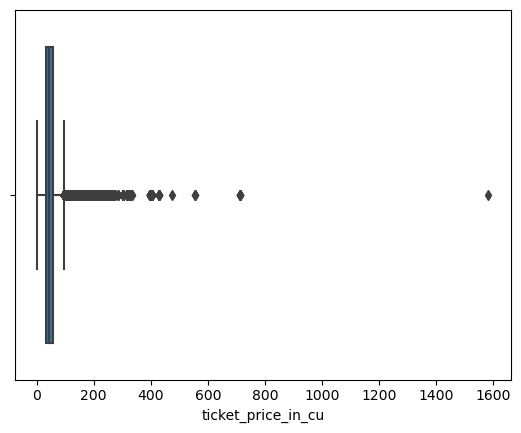

In [114]:
sns.boxplot(x=data_clear['ticket_price_in_cu'])

In [115]:
filtred_data_clear = data_clear[data_clear['ticket_price_in_cu']<200]

<AxesSubplot:xlabel='ticket_price_in_cu'>

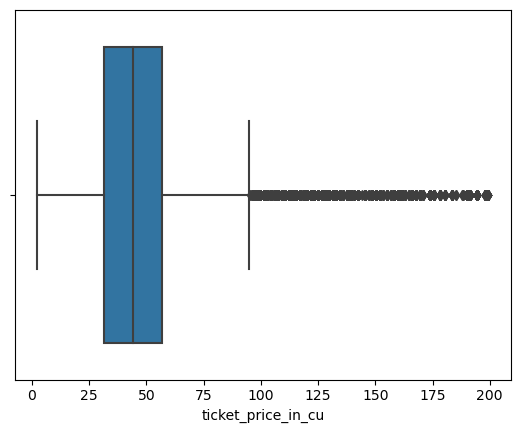

In [116]:
sns.boxplot(x=filtred_data_clear['ticket_price_in_cu'])

In [117]:
data_clear['ticket_price_in_cu'].agg(['mean', 'min', 'max', q1, q2, q3])

mean      47.605952
min        2.373418
max     1582.278481
q1        31.645570
q2        44.303797
q3        56.962025
Name: ticket_price_in_cu, dtype: float64

# Новый возраст

In [478]:
def vozrast0(row):
    if row['movie_age_restriction'] == 0:
        return 1
    else:
        return 0
def vozrast6(row):
    if row['movie_age_restriction'] == 6:
        return 1
    else:
        return 0
def vozrast12(row):
    if row['movie_age_restriction'] == 12:
        return 1
    else:
        return 0
def vozrast16(row):
    if row['movie_age_restriction'] == 16:
        return 1
    else:
        return 0
def vozrast18(row):
    if row['movie_age_restriction'] == 18:
        return 1
    else:
        return 0

In [479]:
filtred_data_clear['movie_age_restriction_is_0'] = filtred_data_clear.apply(vozrast0,axis = 1)
filtred_data_clear['movie_age_restriction_is_6'] = filtred_data_clear.apply(vozrast6,axis = 1)
filtred_data_clear['movie_age_restriction_is_12'] = filtred_data_clear.apply(vozrast12,axis = 1)
filtred_data_clear['movie_age_restriction_is_16'] = filtred_data_clear.apply(vozrast16,axis = 1)
filtred_data_clear['movie_age_restriction_is_18'] = filtred_data_clear.apply(vozrast18,axis = 1)
filtred_data_clear

,order_id,creation_date,session_date,movie_id,movie_name,movie_duration,movie_age_restriction,number_of_tickets,places,sales_in_cu,...,genre_is_family,genre_is_comedy,genre_is_arthouse,count_of_genres,count_of_repeats_by_people,movie_age_restriction_is_0,movie_age_restriction_is_6,movie_age_restriction_is_12,movie_age_restriction_is_16,movie_age_restriction_is_18
0,2441412,2020-03-07,1,32452,Маленькие женщины,135,12,2.0,"ряд 5, место 6, ряд 5, место 5",63.291139,...,1.0,0.0,0.0,2.0,1,0,0,1,0,0
1,2605759,2020-09-15,0,42471,Довод,150,16,2.0,"ряд 6, место 9, ряд 6, место 11",79.113924,...,0.0,0.0,0.0,3.0,1,0,0,0,1,0
2,2686699,2020-10-13,0,42471,Довод,150,16,1.0,"ряд 4, место 6",28.481013,...,0.0,0.0,0.0,3.0,1,0,0,0,1,0
3,2336365,2020-02-22,1,33359,Джентльмены,113,18,2.0,"ряд 4, место 10, ряд 4, место 9",136.075949,...,0.0,0.0,0.0,2.0,1,0,0,0,0,1
4,2169133,2020-02-03,0,32452,Маленькие женщины,135,12,4.0,"ряд 15, место 31, ряд 15, место 32, ряд 15, ме...",189.873418,...,1.0,0.0,0.0,2.0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484021,2523894,2020-08-04,0,47989,BFF 2022: Последние и первые люди,70,16,1.0,"ряд 6, место 15",71.202532,...,0.0,0.0,0.0,2.0,0,0,0,0,1,0
484022,2522250,2020-08-01,1,47989,BFF 2022: Последние и первые люди,70,16,2.0,"ряд 16, место 11, ряд 16, место 12",158.227848,...,0.0,0.0,0.0,2.0,0,0,0,0,1,0
484023,2520660,2020-07-30,0,47989,BFF 2022: Последние и первые люди,70,16,1.0,"ряд 9, место 10",71.202532,...,0.0,0.0,0.0,2.0,0,0,0,0,1,0
484024,2520749,2020-07-30,0,47989,BFF 2022: Последние и первые люди,70,16,3.0,"ряд 7, место 16, ряд 7, место 15, ряд 7, место 14",166.139241,...,0.0,0.0,0.0,2.0,0,0,0,0,1,0


In [ ]:
filtred_data_clear.info()

# Гипотеза 1


fairy_tale - нету ни у кого
animation - нету ни у кого
humor - нету ни у кого
western - нету
noir - нету

Детские жанры с норм выборкой:  family, childish,   cartoon,  historical,   

Взрослые жанры с норм выборкой: triller, military,      horror, criminal,  

Жанры для сравнения: comedy, fiction, drama, action, fantasy, adventure

# Сравнение



comedy_16, fiction_16, drama_16, action_16, fantasy_16, adventure_16
comedy_under_16, fiction_under_16, drama_under_16, action_under_16, fantasy_under_16, adventure_under_16
по процентам p.value

# Гипотеза 2

In [463]:
frame = data_clear.groupby('client_id')['order_id'].count().to_frame()
frame.rename(columns = {'order_id':'count_of_repeats_by_people'}, inplace = True)
filtred_data_clear = filtred_data_clear.merge(frame, how='outer', on = 'client_id')

In [466]:
def f(c):
    if c > 1:
        return 1
    elif c == 1:
        return 0
filtred_data_clear.count_of_repeats_by_people = filtred_data_clear.count_of_repeats_by_people.apply(f)

In [467]:
filtred_data_clear

,order_id,creation_date,session_date,movie_id,movie_name,movie_duration,movie_age_restriction,number_of_tickets,places,sales_in_cu,...,genre_is_biography,genre_is_criminal,genre_is_tragicomedy,genre_is_biopic,genre_is_mystic,genre_is_family,genre_is_comedy,genre_is_arthouse,count_of_genres,count_of_repeats_by_people
0,2441412,2020-03-07,1,32452,Маленькие женщины,135,12,2.0,"ряд 5, место 6, ряд 5, место 5",63.291139,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
1,2605759,2020-09-15,0,42471,Довод,150,16,2.0,"ряд 6, место 9, ряд 6, место 11",79.113924,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1
2,2686699,2020-10-13,0,42471,Довод,150,16,1.0,"ряд 4, место 6",28.481013,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1
3,2336365,2020-02-22,1,33359,Джентльмены,113,18,2.0,"ряд 4, место 10, ряд 4, место 9",136.075949,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1
4,2169133,2020-02-03,0,32452,Маленькие женщины,135,12,4.0,"ряд 15, место 31, ряд 15, место 32, ряд 15, ме...",189.873418,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484021,2523894,2020-08-04,0,47989,BFF 2022: Последние и первые люди,70,16,1.0,"ряд 6, место 15",71.202532,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0
484022,2522250,2020-08-01,1,47989,BFF 2022: Последние и первые люди,70,16,2.0,"ряд 16, место 11, ряд 16, место 12",158.227848,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0
484023,2520660,2020-07-30,0,47989,BFF 2022: Последние и первые люди,70,16,1.0,"ряд 9, место 10",71.202532,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0
484024,2520749,2020-07-30,0,47989,BFF 2022: Последние и первые люди,70,16,3.0,"ряд 7, место 16, ряд 7, место 15, ряд 7, место 14",166.139241,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0


In [459]:
q1 = data_clear['ticket_price_in_cu'].quantile(0.25)
q3 = data_clear['ticket_price_in_cu'].quantile(0.75)
iqr = q3 - q1
data_clear = data_clear[(data_clear.ticket_price_in_cu <= q3 + iqr) & (data_clear.ticket_price_in_cu >= q1 - iqr)]


In [629]:
filtred_data_clear['movie_duration'].agg(['mean', 'min', 'max', q1, q2, q3])
filtred_data_clear = filtred_data_clear[filtred_data_clear['movie_duration']<200]
filtred_data_clear = filtred_data_clear[filtred_data_clear['movie_duration']>60]


filtred_data_clear

,order_id,creation_date,session_date,movie_id,movie_name,movie_duration,movie_age_restriction,number_of_tickets,places,sales_in_cu,...,genre_is_family,genre_is_comedy,genre_is_arthouse,count_of_genres,count_of_repeats_by_people,movie_age_restriction_is_0,movie_age_restriction_is_6,movie_age_restriction_is_12,movie_age_restriction_is_16,movie_age_restriction_is_18
0,2441412,2020-03-07,1,32452,Маленькие женщины,135,12,2.0,"ряд 5, место 6, ряд 5, место 5",63.291139,...,1.0,0.0,0.0,2.0,1,0,0,1,0,0
1,2605759,2020-09-15,0,42471,Довод,150,16,2.0,"ряд 6, место 9, ряд 6, место 11",79.113924,...,0.0,0.0,0.0,3.0,1,0,0,0,1,0
2,2686699,2020-10-13,0,42471,Довод,150,16,1.0,"ряд 4, место 6",28.481013,...,0.0,0.0,0.0,3.0,1,0,0,0,1,0
3,2336365,2020-02-22,1,33359,Джентльмены,113,18,2.0,"ряд 4, место 10, ряд 4, место 9",136.075949,...,0.0,0.0,0.0,2.0,1,0,0,0,0,1
4,2169133,2020-02-03,0,32452,Маленькие женщины,135,12,4.0,"ряд 15, место 31, ряд 15, место 32, ряд 15, ме...",189.873418,...,1.0,0.0,0.0,2.0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484021,2523894,2020-08-04,0,47989,BFF 2022: Последние и первые люди,70,16,1.0,"ряд 6, место 15",71.202532,...,0.0,0.0,0.0,2.0,0,0,0,0,1,0
484022,2522250,2020-08-01,1,47989,BFF 2022: Последние и первые люди,70,16,2.0,"ряд 16, место 11, ряд 16, место 12",158.227848,...,0.0,0.0,0.0,2.0,0,0,0,0,1,0
484023,2520660,2020-07-30,0,47989,BFF 2022: Последние и первые люди,70,16,1.0,"ряд 9, место 10",71.202532,...,0.0,0.0,0.0,2.0,0,0,0,0,1,0
484024,2520749,2020-07-30,0,47989,BFF 2022: Последние и первые люди,70,16,3.0,"ряд 7, место 16, ряд 7, место 15, ряд 7, место 14",166.139241,...,0.0,0.0,0.0,2.0,0,0,0,0,1,0


In [632]:
filtred_data_clear_machine_first_try = filtred_data_clear.drop(columns=['order_id', 'creation_date', 'movie_id', 'movie_name', 'number_of_tickets', 'places', 'sales_in_cu', 'cinema_name', 'cinema_address', 'cinema_city', 'client_id', 'movie_rating', 'count_of_genres', 'movie_age_restriction', 'cinema_latitude', 'cinema_longitude'])
#filtred_data_clear_machine_first_try_sales = filtred_data_clear['sales_in_cu']
#filtred_data_clear_machine_first_try_sales = filtred_data_clear_machine_first_try_sales.reset_index(drop= True)
filtred_data_clear_machine_first_try

,session_date,movie_duration,ticket_price_in_cu,genre_is_triller,genre_is_military,genre_is_action,genre_is_biographical,genre_is_fantasy,genre_is_historical,genre_is_drama,...,genre_is_mystic,genre_is_family,genre_is_comedy,genre_is_arthouse,count_of_repeats_by_people,movie_age_restriction_is_0,movie_age_restriction_is_6,movie_age_restriction_is_12,movie_age_restriction_is_16,movie_age_restriction_is_18
0,1,135,31.645570,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1,0,0,1,0,0
1,0,150,39.556962,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1,0,0,0,1,0
2,0,150,28.481013,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1,0,0,0,1,0
3,1,113,68.037975,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0,0,0,0,1
4,0,135,47.468354,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484021,0,70,71.202532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0
484022,1,70,79.113924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0
484023,0,70,71.202532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0
484024,0,70,55.379747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0


In [633]:
filtred_data_clear_machine_first_try

,session_date,movie_duration,ticket_price_in_cu,genre_is_triller,genre_is_military,genre_is_action,genre_is_biographical,genre_is_fantasy,genre_is_historical,genre_is_drama,...,genre_is_mystic,genre_is_family,genre_is_comedy,genre_is_arthouse,count_of_repeats_by_people,movie_age_restriction_is_0,movie_age_restriction_is_6,movie_age_restriction_is_12,movie_age_restriction_is_16,movie_age_restriction_is_18
0,1,135,31.645570,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1,0,0,1,0,0
1,0,150,39.556962,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1,0,0,0,1,0
2,0,150,28.481013,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1,0,0,0,1,0
3,1,113,68.037975,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1,0,0,0,0,1
4,0,135,47.468354,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484021,0,70,71.202532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0
484022,1,70,79.113924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0
484023,0,70,71.202532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0
484024,0,70,55.379747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0


In [634]:
min_max_scaler = preprocessing.MinMaxScaler()

In [635]:
filtred_data_clear_first_try_min_max = min_max_scaler.fit_transform(filtred_data_clear_machine_first_try)

In [636]:
filtred_data_clear_first_try_min_max

array([[1.        , 0.55384615, 0.32986734, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.66923077, 0.43743277, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.66923077, 0.28684116, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.05384615, 0.86769451, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.05384615, 0.65256364, ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.35384615, 0.97525995, ..., 0.        , 1.        ,
        0.        ]])

In [637]:
data_ms = pd.DataFrame(filtred_data_clear_first_try_min_max, columns = filtred_data_clear_machine_first_try.columns)

In [639]:
data_ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483409 entries, 0 to 483408
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   session_date                 483409 non-null  float64
 1   movie_duration               483409 non-null  float64
 2   ticket_price_in_cu           483409 non-null  float64
 3   genre_is_triller             483409 non-null  float64
 4   genre_is_military            483409 non-null  float64
 5   genre_is_action              483409 non-null  float64
 6   genre_is_biographical        483409 non-null  float64
 7   genre_is_fantasy             483409 non-null  float64
 8   genre_is_historical          483409 non-null  float64
 9   genre_is_drama               483409 non-null  float64
 10  genre_is_cartoon             483409 non-null  float64
 11  genre_is_documentary         483409 non-null  float64
 12  genre_is_adventure           483409 non-null  float64
 13 

In [640]:
data_ms_test, data_ms_learn = train_test_split(data_ms, train_size=0.3, random_state=0)


In [833]:
data_ms_learn = data_ms_learn.sort_index()
data_ms_learn

,session_date,movie_duration,ticket_price_in_cu,genre_is_triller,genre_is_military,genre_is_action,genre_is_biographical,genre_is_fantasy,genre_is_historical,genre_is_drama,...,genre_is_family,genre_is_comedy,genre_is_arthouse,count_of_repeats_by_people,movie_age_restriction_is_0,movie_age_restriction_is_6,movie_age_restriction_is_12,movie_age_restriction_is_16,movie_age_restriction_is_18,three_clusters_learn
0,1.0,0.553846,0.329867,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
2,0.0,0.669231,0.286841,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3
5,1.0,0.715385,0.437433,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3
6,1.0,0.607692,0.652564,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4
7,0.0,0.553846,0.222302,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483401,0.0,0.207692,0.329867,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
483402,1.0,0.053846,0.975260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
483403,1.0,0.053846,0.652564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
483406,0.0,0.053846,0.867695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4


In [642]:
data_ms_test = data_ms_test.sort_index()
data_ms_test

,session_date,movie_duration,ticket_price_in_cu,genre_is_triller,genre_is_military,genre_is_action,genre_is_biographical,genre_is_fantasy,genre_is_historical,genre_is_drama,...,genre_is_mystic,genre_is_family,genre_is_comedy,genre_is_arthouse,count_of_repeats_by_people,movie_age_restriction_is_0,movie_age_restriction_is_6,movie_age_restriction_is_12,movie_age_restriction_is_16,movie_age_restriction_is_18
1,0.0,0.669231,0.437433,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.384615,0.824668,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.553846,0.544998,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9,0.0,0.469231,0.222302,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
21,1.0,0.284615,0.953747,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483395,0.0,0.461538,0.437433,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
483398,1.0,0.130769,0.760129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
483404,0.0,0.053846,0.867695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
483405,1.0,0.053846,0.975260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [139]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(data_ms_learn)

In [143]:
labels = kmeans.labels_
labels

array([2, 2, 2, ..., 2, 2, 2])

In [144]:
out = kmeans.predict(data_ms_test)
out

array([2, 2, 2, ..., 2, 2, 2])

In [147]:
data_ms_three_clusters_learn = data_ms_learn
data_ms_three_clusters_test = data_ms_test

In [150]:
data_ms_three_clusters_learn['three_clusters_learn'] = labels
three_clusters_learn = data_ms_three_clusters_learn['three_clusters_learn']
three_clusters_learn



0         2
2         2
5         2
6         2
7         2
         ..
511378    3
511379    2
511380    2
511382    2
511384    2
Name: three_clusters_learn, Length: 357970, dtype: int32

In [151]:
data_ms_three_clusters_test['three_clusters_test'] = out
three_clusters_test = data_ms_three_clusters_test['three_clusters_test']
three_clusters_test

1         2
3         2
4         2
9         2
21        2
         ..
511371    1
511373    1
511374    2
511381    2
511383    2
Name: three_clusters_test, Length: 153415, dtype: int32

In [152]:
filtred_data_clear_machine = filtred_data_clear_machine.reset_index(drop= True)
filtred_data_clear_machine_learn_three_clusters = filtred_data_clear_machine
filtred_data_clear_machine_test_three_clusters = filtred_data_clear_machine


In [153]:
learn = pd.merge(filtred_data_clear_machine_learn_three_clusters, three_clusters_learn, left_index=True, right_index=True)
learn

,order_id,creation_date,session_date,movie_id,movie_name,movie_duration,movie_age_restriction,number_of_tickets,places,sales_in_cu,...,genre_is_biography,genre_is_criminal,genre_is_tragicomedy,genre_is_biopic,genre_is_mystic,genre_is_family,genre_is_comedy,genre_is_arthouse,count_of_genres,three_clusters_learn
0,2441412,2020-03-07,1,32452,Маленькие женщины,135,12,2.0,"ряд 5, место 6, ряд 5, место 5",63.291139,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2
2,2187694,2020-02-06,0,32452,Маленькие женщины,135,12,2.0,"ряд 8, место 8, ряд 8, место 9",47.468354,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2
5,2206635,2020-02-08,1,32452,Маленькие женщины,135,12,2.0,"ряд 4, место 7, ряд 4, место 8",155.063291,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2
6,2305515,2020-02-19,0,32452,Маленькие женщины,135,12,1.0,"ряд 8, место 7",31.645570,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2
7,2184412,2020-02-05,0,32452,Маленькие женщины,135,12,2.0,"ряд 5, место 3, ряд 5, место 4",60.126582,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511378,2581236,2020-09-09,0,47462,Несломленные,95,6,2.0,"ряд 5, место 5, ряд 5, место 6",47.468354,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,3
511379,2529879,2020-08-12,0,48426,Крестон,73,18,1.0,"ряд 4, место 15",71.202532,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
511380,2523437,2020-08-03,0,48426,Крестон,73,18,2.0,"ряд 7, место 15, ряд 7, место 14",142.405063,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2
511382,2537917,2020-08-22,1,49547,«ДОКер 2020»: Роболав,76,16,1.0,"ряд 7, место 14",63.291139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2


In [154]:
test = pd.merge(filtred_data_clear_machine_test_three_clusters, three_clusters_test, left_index=True, right_index=True)
test

,order_id,creation_date,session_date,movie_id,movie_name,movie_duration,movie_age_restriction,number_of_tickets,places,sales_in_cu,...,genre_is_biography,genre_is_criminal,genre_is_tragicomedy,genre_is_biopic,genre_is_mystic,genre_is_family,genre_is_comedy,genre_is_arthouse,count_of_genres,three_clusters_test
1,2169133,2020-02-03,0,32452,Маленькие женщины,135,12,4.0,"ряд 15, место 31, ряд 15, место 32, ряд 15, ме...",189.873418,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2
3,2182225,2020-02-05,0,32452,Маленькие женщины,135,12,2.0,"ряд 8, место 6, ряд 8, место 5",47.468354,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2
4,2209967,2020-02-08,0,32452,Маленькие женщины,135,12,3.0,"ряд 5, место 13, ряд 5, место 12, ряд 5, место 11",132.911392,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2
9,2175826,2020-02-04,0,32452,Маленькие женщины,135,12,2.0,"ряд 4, место 9, ряд 4, место 10",79.113924,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2
21,2175393,2020-02-04,0,32452,Маленькие женщины,135,12,2.0,"ряд 4, место 7, ряд 4, место 8",79.113924,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511371,2711954,2020-10-25,1,20166,Головокружение,128,18,2.0,"ряд 10, место 47, ряд 10, место 48",189.873418,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
511373,2707538,2020-10-23,1,20166,Головокружение,128,18,1.0,"ряд 6, место 42",94.936709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
511374,2624661,2020-09-20,0,41489,N.I.C.E. Хорошие девчонки,104,16,1.0,"ряд 10, место 15",55.379747,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2
511381,2661648,2020-10-03,1,41491,N.I.C.E. Мы будем юными и прекрасными,92,16,2.0,"ряд 10, место 11, ряд 10, место 12",110.759494,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2


# Выбор оптимального числа кластеров


In [644]:
def checker(row):
    if ((learn_sales - row['number_of_tickets'])**2).min() == ((learn_sales.iloc[row['three_clusters_test']] - row['number_of_tickets'])**2):
        return 'corr'
    else:
        return 'ncorr'
    


In [643]:
mistake = []

# Анализ кластеров

In [645]:
    kmeans = KMeans(n_clusters=5, random_state=0).fit(data_ms_learn)
    labels = kmeans.labels_
    out = kmeans.predict(data_ms_test)
    data_ms_three_clusters_learn = data_ms_learn
    data_ms_three_clusters_test = data_ms_test
    data_ms_three_clusters_learn['three_clusters_learn'] = labels
    three_clusters_learn = data_ms_three_clusters_learn['three_clusters_learn']
    data_ms_three_clusters_test['three_clusters_test'] = out
    three_clusters_test = data_ms_three_clusters_test['three_clusters_test']
    filtred_data_clear_machine_learn_three_clusters = filtred_data_clear_machine
    filtred_data_clear_machine_test_three_clusters = filtred_data_clear_machine
    learn = pd.merge(filtred_data_clear_machine_learn_three_clusters, three_clusters_learn, left_index=True, right_index=True)
    test = pd.merge(filtred_data_clear_machine_test_three_clusters, three_clusters_test, left_index=True, right_index=True)
    learn_sales = learn.groupby('three_clusters_learn')['number_of_tickets'].mean()
    test_sales = test.groupby('three_clusters_test')['number_of_tickets'].mean()
    test['mistake'] = test.apply(checker, axis=1)
    mistake.append((test.value_counts('mistake').loc['ncorr']/len(test))*100)

In [652]:
test.value_counts('mistake')

mistake
ncorr    135199
corr       9639
dtype: int64

In [195]:
learn_tickets = learn.groupby('three_clusters_learn')['number_of_tickets'].mean()
test_tickets = test.groupby('three_clusters_test')['number_of_tickets'].mean()

In [653]:
test_sales

three_clusters_test
0    2.091813
1    2.189969
2    2.165538
3    2.052214
4    2.067865
Name: number_of_tickets, dtype: float64

In [654]:
data_ms_learn

,session_date,movie_duration,ticket_price_in_cu,genre_is_triller,genre_is_military,genre_is_action,genre_is_biographical,genre_is_fantasy,genre_is_historical,genre_is_drama,...,genre_is_family,genre_is_comedy,genre_is_arthouse,count_of_repeats_by_people,movie_age_restriction_is_0,movie_age_restriction_is_6,movie_age_restriction_is_12,movie_age_restriction_is_16,movie_age_restriction_is_18,three_clusters_learn
0,1.0,0.553846,0.329867,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
2,0.0,0.669231,0.286841,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3
5,1.0,0.715385,0.437433,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3
6,1.0,0.607692,0.652564,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,4
7,0.0,0.553846,0.222302,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483401,0.0,0.207692,0.329867,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
483402,1.0,0.053846,0.975260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
483403,1.0,0.053846,0.652564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4
483406,0.0,0.053846,0.867695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4


# Нейросеть


In [424]:
neir_test, neir_learn, out_neir_test, out_neir_learn = train_test_split(data_ms, filtred_data_clear_machine_first_try_sales, train_size=0.3, random_state=0)
neir_test

,session_date,movie_duration,ticket_price_in_cu,genre_is_triller,genre_is_military,genre_is_action,genre_is_biographical,genre_is_fantasy,genre_is_historical,genre_is_drama,...,genre_is_biopic,genre_is_mystic,genre_is_family,genre_is_comedy,genre_is_arthouse,movie_age_restriction_is_0,movie_age_restriction_is_6,movie_age_restriction_is_12,movie_age_restriction_is_16,movie_age_restriction_is_18
152172,1.0,0.219680,0.277108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
182177,0.0,0.297483,0.195984,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
416261,0.0,0.208238,0.172691,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
113838,0.0,0.270023,0.132530,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
8109,0.0,0.279176,0.309237,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439107,1.0,0.283753,0.212851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
117952,1.0,0.270023,0.212851,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
435829,0.0,0.183066,0.204819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
305711,1.0,0.228833,0.285141,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [413]:
ANN_regressor = MLPRegressor(hidden_layer_sizes=(3, 3, 3, 3), max_iter = 10000, activation = 'tanh', solver='adam', alpha = 0.0001, random_state = 0)

In [414]:
ANN_regressor.fit(neir_learn, out_neir_learn)

MLPRegressor(activation='tanh', hidden_layer_sizes=(3, 3, 3, 3), max_iter=10000,
             random_state=0)

In [415]:
Pred_a = ANN_regressor.predict(neir_learn)

In [416]:
Pred_b = ANN_regressor.predict(neir_test)

In [417]:
mean_absolute_error(out_neir_test, Pred_b)

24.104481690043592

In [418]:
mean_absolute_error(out_neir_learn, Pred_a)

24.139912144541256

In [422]:
r2_score(out_neir_test, Pred_b)

0.5023470083744224

In [423]:
r2_score(out_neir_learn, Pred_a)

0.5005144908675403

In [609]:
filtred_data_clear_machine = filtred_data_clear

In [610]:
filtred_data_clear_machine_second_try = filtred_data_clear_machine.drop(columns=['order_id', 'creation_date', 'movie_id', 'movie_name', 'number_of_tickets', 'places', 'sales_in_cu', 'cinema_name', 'cinema_address', 'cinema_city', 'client_id', 'count_of_genres', 'movie_age_restriction'])
filtred_data_clear_machine_second_try_target = filtred_data_clear_machine['number_of_tickets']


In [611]:
filtred_data_clear_machine_second_try

,session_date,movie_duration,ticket_price_in_cu,cinema_latitude,cinema_longitude,movie_rating,genre_is_triller,genre_is_military,genre_is_action,genre_is_biographical,...,genre_is_mystic,genre_is_family,genre_is_comedy,genre_is_arthouse,count_of_repeats_by_people,movie_age_restriction_is_0,movie_age_restriction_is_6,movie_age_restriction_is_12,movie_age_restriction_is_16,movie_age_restriction_is_18
0,1,135,31.645570,55.809469,37.464571,7.70,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1,0,0,1,0,0
1,0,150,39.556962,55.738591,37.411005,7.50,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1,0,0,0,1,0
2,0,150,28.481013,55.738591,37.411005,7.50,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1,0,0,0,1,0
3,1,113,68.037975,55.738591,37.411005,8.15,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1,0,0,0,0,1
4,0,135,47.468354,55.753338,37.587615,7.70,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484021,0,70,71.202532,55.727775,37.601591,6.65,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0
484022,1,70,79.113924,55.753338,37.587615,6.65,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0
484023,0,70,71.202532,55.753338,37.587615,6.65,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0
484024,0,70,55.379747,55.737252,37.609570,6.65,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0


In [612]:
def weekday(row):
    if row['session_date'] == 0:
        return 1
    else:
        return 0
def weekend(row):
    if row['session_date'] == 1:
        return 1
    else:
        return 0

filtred_data_clear_machine_second_try['session_date_is_weekday'] = filtred_data_clear_machine_second_try.apply(weekday,axis = 1)
filtred_data_clear_machine_second_try['session_date_is_weekend'] = filtred_data_clear_machine_second_try.apply(weekend,axis = 1)

In [613]:
filtred_data_clear_machine_second_try = filtred_data_clear_machine_second_try.drop('session_date', axis=1)

In [616]:
min_max_scaler = preprocessing.MinMaxScaler()

In [618]:
filtred_data_clear_second_try_min_max = min_max_scaler.fit_transform(filtred_data_clear_machine_second_try)

data_ms_second = pd.DataFrame(filtred_data_clear_second_try_min_max, columns = filtred_data_clear_machine_second_try.columns)

In [619]:
data_ms_second

,movie_duration,ticket_price_in_cu,cinema_latitude,cinema_longitude,movie_rating,genre_is_triller,genre_is_military,genre_is_action,genre_is_biographical,genre_is_fantasy,...,genre_is_comedy,genre_is_arthouse,count_of_repeats_by_people,movie_age_restriction_is_0,movie_age_restriction_is_6,movie_age_restriction_is_12,movie_age_restriction_is_16,movie_age_restriction_is_18,session_date_is_weekday,session_date_is_weekend
0,0.553846,0.329867,0.495787,0.125035,0.058750,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.669231,0.437433,0.493092,0.124648,0.056250,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.669231,0.286841,0.493092,0.124648,0.056250,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.384615,0.824668,0.493092,0.124648,0.064375,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.553846,0.544998,0.493653,0.125924,0.058750,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483404,0.053846,0.867695,0.492680,0.126025,0.045625,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
483405,0.053846,0.975260,0.493653,0.125924,0.045625,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
483406,0.053846,0.867695,0.493653,0.125924,0.045625,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
483407,0.053846,0.652564,0.493041,0.126083,0.045625,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [485]:
filtred_data_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 484026 entries, 0 to 484025
Data columns (total 49 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   order_id                     484026 non-null  int64  
 1   creation_date                484026 non-null  object 
 2   session_date                 484026 non-null  int64  
 3   movie_id                     484026 non-null  int64  
 4   movie_name                   484026 non-null  object 
 5   movie_duration               484026 non-null  int32  
 6   movie_age_restriction        484026 non-null  int64  
 7   number_of_tickets            484026 non-null  float64
 8   places                       484026 non-null  object 
 9   sales_in_cu                  484026 non-null  float64
 10  ticket_price_in_cu           484026 non-null  float64
 11  cinema_name                  484026 non-null  object 
 12  cinema_address               484026 non-null  object 
 13 

In [620]:
test2, learn2, out_test2, out_learn2 = train_test_split(data_ms_second, filtred_data_clear_machine_second_try_target, train_size=0.3, random_state=0)

In [621]:
ann_regressor = MLPRegressor(hidden_layer_sizes=(10,10,10,10), max_iter = 100000, activation = 'tanh', solver='adam', alpha = 0.0001, random_state = 0)

In [622]:
ann_regressor.fit(learn2, out_learn2)

MLPRegressor(activation='tanh', hidden_layer_sizes=(10, 10, 10, 10),
             max_iter=100000, random_state=0)

In [623]:
predict_a = ann_regressor.predict(learn2)

In [624]:
predict_b = ann_regressor.predict(test2)

In [625]:
mean_absolute_error(out_learn2, predict_a)

0.5230133486366706

In [626]:
mean_absolute_error(out_test2, predict_b)

0.5228317357011962

# Нейронка в кластерах

kmeans = KMeans(n_clusters=5, random_state=0).fit(data_ms_learn)
labels = kmeans.labels_
out = kmeans.predict(data_ms_test)
data_ms_three_clusters_learn = data_ms_learn
data_ms_three_clusters_test = data_ms_test
data_ms_three_clusters_learn['three_clusters_learn'] = labels
three_clusters_learn = data_ms_three_clusters_learn['three_clusters_learn']
data_ms_three_clusters_test['three_clusters_test'] = out
three_clusters_test = data_ms_three_clusters_test['three_clusters_test']
filtred_data_clear_machine_learn_three_clusters = filtred_data_clear_machine
filtred_data_clear_machine_test_three_clusters = filtred_data_clear_machine
learn = pd.merge(filtred_data_clear_machine_learn_three_clusters, three_clusters_learn, left_index=True, right_index=True)
test = pd.merge(filtred_data_clear_machine_test_three_clusters, three_clusters_test, left_index=True, right_index=True)
learn_sales = learn.groupby('three_clusters_learn')['sales_in_cu'].mean()
test_sales = test.groupby('three_clusters_test')['sales_in_cu'].mean()

# Новая группировка

In [664]:
filtred_data_clear_msk = filtred_data_clear[filtred_data_clear['cinema_city']=='Москва']
filtred_data_clear_spb = filtred_data_clear[filtred_data_clear['cinema_city']=='Санкт-Петербург']

# Москва

In [668]:
filtred_data_clear_msk_16 = filtred_data_clear_msk[(filtred_data_clear_msk['movie_age_restriction']==18) | (filtred_data_clear_msk['movie_age_restriction']==16)]
filtred_data_clear_msk_under_16 = filtred_data_clear_msk[~((filtred_data_clear_msk['movie_age_restriction']==18) | (filtred_data_clear_msk['movie_age_restriction']==16))]

,order_id,creation_date,session_date,movie_id,movie_name,movie_duration,movie_age_restriction,number_of_tickets,places,sales_in_cu,...,genre_is_family,genre_is_comedy,genre_is_arthouse,count_of_genres,count_of_repeats_by_people,movie_age_restriction_is_0,movie_age_restriction_is_6,movie_age_restriction_is_12,movie_age_restriction_is_16,movie_age_restriction_is_18
0,2441412,2020-03-07,1,32452,Маленькие женщины,135,12,2.0,"ряд 5, место 6, ряд 5, место 5",63.291139,...,1.0,0.0,0.0,2.0,1,0,0,1,0,0
4,2169133,2020-02-03,0,32452,Маленькие женщины,135,12,4.0,"ряд 15, место 31, ряд 15, место 32, ряд 15, ме...",189.873418,...,1.0,0.0,0.0,2.0,1,0,0,1,0,0
16,2209967,2020-02-08,0,32452,Маленькие женщины,135,12,3.0,"ряд 5, место 13, ряд 5, место 12, ряд 5, место 11",132.911392,...,1.0,0.0,0.0,2.0,0,0,0,1,0,0
17,2206635,2020-02-08,1,32452,Маленькие женщины,135,12,2.0,"ряд 4, место 7, ряд 4, место 8",155.063291,...,1.0,0.0,0.0,2.0,1,0,0,1,0,0
19,2483293,2020-03-13,0,39065,Вперёд,103,6,2.0,"ряд 6, место 9, ряд 6, место 8",79.113924,...,1.0,1.0,0.0,5.0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483980,2048663,2020-01-14,0,26914,Великий диктатор,115,6,1.0,"ряд 4, место 2",31.645570,...,1.0,1.0,0.0,3.0,0,0,1,0,0,0
483989,1992589,2020-01-05,0,6038,Петсон и Финдус-2: Лучшее на свете Рождество,82,6,3.0,"ряд 2, место 2, ряд 2, место 3, ряд 2, место 4",85.443038,...,1.0,1.0,0.0,3.0,0,0,1,0,0,0
484005,2715124,2020-10-26,0,7942,Песнь моря,93,6,1.0,"ряд 2, место 3",23.734177,...,1.0,0.0,0.0,3.0,1,0,1,0,0,0
484006,2717449,2020-10-27,0,873,Песнь моря,93,6,1.0,"ряд 2, место 5",18.987342,...,1.0,0.0,0.0,3.0,1,0,1,0,0,0


# Питер

In [672]:
filtred_data_clear_spb_16  = filtred_data_clear_spb[(filtred_data_clear_spb['movie_age_restriction']==18) | (filtred_data_clear_spb['movie_age_restriction']==16)]
filtred_data_clear_spb_under_16 = filtred_data_clear_spb[~((filtred_data_clear_spb['movie_age_restriction']==18) | (filtred_data_clear_spb['movie_age_restriction']==16))]


,order_id,creation_date,session_date,movie_id,movie_name,movie_duration,movie_age_restriction,number_of_tickets,places,sales_in_cu,...,genre_is_family,genre_is_comedy,genre_is_arthouse,count_of_genres,count_of_repeats_by_people,movie_age_restriction_is_0,movie_age_restriction_is_6,movie_age_restriction_is_12,movie_age_restriction_is_16,movie_age_restriction_is_18
13,2182225,2020-02-05,0,32452,Маленькие женщины,135,12,2.0,"ряд 8, место 6, ряд 8, место 5",47.468354,...,1.0,0.0,0.0,2.0,1,0,0,1,0,0
38,2175826,2020-02-04,0,32452,Маленькие женщины,135,12,2.0,"ряд 4, место 9, ряд 4, место 10",79.113924,...,1.0,0.0,0.0,2.0,1,0,0,1,0,0
81,2280703,2020-02-16,1,32452,Маленькие женщины,135,12,2.0,"ряд 8, место 4, ряд 8, место 3",69.620253,...,1.0,0.0,0.0,2.0,1,0,0,1,0,0
84,2175393,2020-02-04,0,32452,Маленькие женщины,135,12,2.0,"ряд 4, место 7, ряд 4, место 8",79.113924,...,1.0,0.0,0.0,2.0,1,0,0,1,0,0
96,2202976,2020-02-08,1,32452,Маленькие женщины,135,12,1.0,"ряд 1, место 8",39.556962,...,1.0,0.0,0.0,2.0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483944,2040740,2020-01-12,1,6837,Акварель,89,12,1.0,"ряд 6, место 18",47.468354,...,0.0,0.0,0.0,1.0,0,0,0,1,0,0
483946,1997741,2020-01-06,0,6837,Акварель,89,12,2.0,"ряд 3, место 14, ряд 3, место 15",110.759494,...,0.0,0.0,0.0,1.0,0,0,0,1,0,0
483955,1956628,2020-01-02,0,24287,Давай разведемся!,96,12,3.0,"ряд 5, место 5, ряд 5, место 6, ряд 5, место 7",118.670886,...,1.0,1.0,0.0,2.0,0,0,0,1,0,0
483956,1965016,2020-01-03,0,20961,Давай разведемся!,102,12,2.0,"ряд 2, место 6, ряд 2, место 5",79.113924,...,1.0,1.0,0.0,2.0,0,0,0,1,0,0


# НОВАЯ ГРУППИРОВКА ВОЗРАСТНОЕ ОГРАНИЧЕНИЕ ОНЛИ

In [674]:
filtred_data_clear_16 = filtred_data_clear[(filtred_data_clear['movie_age_restriction']==18) | (filtred_data_clear['movie_age_restriction']==16)]
filtred_data_clear_under_16 = filtred_data_clear[~((filtred_data_clear['movie_age_restriction']==18) | (filtred_data_clear['movie_age_restriction']==16))]

# НЕЙРОНКИ

In [819]:
filtred_data_clear_machine_16 = filtred_data_clear_16

filtred_data_clear_machine_16_year = filtred_data_clear_machine_16.drop(columns=['order_id', 'creation_date', 'movie_id', 'movie_name', 'number_of_tickets', 'places', 'sales_in_cu', 'cinema_name', 'cinema_address', 'cinema_city', 'client_id', 'count_of_genres', 'movie_age_restriction', 'cinema_latitude', 'cinema_longitude', 'movie_age_restriction_is_12', 'movie_age_restriction_is_6', 'movie_age_restriction_is_0', 'count_of_repeats_by_people', 'session_date'])
filtred_data_clear_machine_under_16_year_target = filtred_data_clear_machine_16['number_of_tickets']


In [820]:
filtred_data_clear_machine_16_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281048 entries, 1 to 484025
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   movie_duration               281048 non-null  int32  
 1   ticket_price_in_cu           281048 non-null  float64
 2   movie_rating                 281048 non-null  float64
 3   genre_is_triller             281048 non-null  float64
 4   genre_is_military            281048 non-null  float64
 5   genre_is_action              281048 non-null  float64
 6   genre_is_biographical        281048 non-null  float64
 7   genre_is_fantasy             281048 non-null  float64
 8   genre_is_historical          281048 non-null  float64
 9   genre_is_drama               281048 non-null  float64
 10  genre_is_cartoon             281048 non-null  float64
 11  genre_is_documentary         281048 non-null  float64
 12  genre_is_adventure           281048 non-null  float64
 13 

In [822]:
filtred_data_clear_machine_16_year = filtred_data_clear_machine_16_year.reset_index(drop=True)

In [823]:
filtred_data_clear_machine_under_16_year_target = filtred_data_clear_machine_under_16_year_target.reset_index(drop=True)

In [824]:
filtred_data_clear_machine_16_year

,movie_duration,ticket_price_in_cu,movie_rating,genre_is_triller,genre_is_military,genre_is_action,genre_is_biographical,genre_is_fantasy,genre_is_historical,genre_is_drama,...,genre_is_biography,genre_is_criminal,genre_is_tragicomedy,genre_is_biopic,genre_is_mystic,genre_is_family,genre_is_comedy,genre_is_arthouse,movie_age_restriction_is_16,movie_age_restriction_is_18
0,150,39.556962,7.50,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1,150,28.481013,7.50,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
2,113,68.037975,8.15,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3,156,39.556962,8.20,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,1
4,142,55.379747,8.85,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281043,70,71.202532,6.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
281044,70,79.113924,6.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
281045,70,71.202532,6.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
281046,70,55.379747,6.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0


In [700]:
def weekday(row):
    if row['session_date'] == 0:
        return 1
    else:
        return 0
def weekend(row):
    if row['session_date'] == 1:
        return 1
    else:
        return 0

filtred_data_clear_machine_16_year['session_date_is_weekday'] = filtred_data_clear_machine_16_year.apply(weekday,axis = 1)
filtred_data_clear_machine_16_year['session_date_is_weekend'] = filtred_data_clear_machine_16_year.apply(weekend,axis = 1)

In [702]:
filtred_data_clear_machine_16_year = filtred_data_clear_machine_16_year.drop('session_date', axis=1)

In [705]:
filtred_data_clear_machine_16_year

,movie_duration,ticket_price_in_cu,genre_is_triller,genre_is_military,genre_is_action,genre_is_biographical,genre_is_fantasy,genre_is_historical,genre_is_drama,genre_is_cartoon,...,genre_is_comedy,genre_is_arthouse,count_of_repeats_by_people,movie_age_restriction_is_0,movie_age_restriction_is_6,movie_age_restriction_is_12,movie_age_restriction_is_16,movie_age_restriction_is_18,session_date_is_weekday,session_date_is_weekend
0,150,39.556962,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1,0,0,0,1,0,1,0
1,150,28.481013,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1,0,0,0,1,0,1,0
2,113,68.037975,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1,0,0,0,0,1,0,1
3,156,39.556962,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1,0,0,0,0,1,0,1
4,142,55.379747,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281043,70,71.202532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,1,0,1,0
281044,70,79.113924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,1,0,0,1
281045,70,71.202532,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,1,0,1,0
281046,70,55.379747,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,0,0,1,0,1,0


In [825]:
min_max_scaler = preprocessing.MinMaxScaler()

filtred_data_clear_machine_16_year_min_max = min_max_scaler.fit_transform(filtred_data_clear_machine_16_year)

year_16_ms = pd.DataFrame(filtred_data_clear_machine_16_year_min_max, columns = filtred_data_clear_machine_16_year.columns)
year_16_ms

,movie_duration,ticket_price_in_cu,movie_rating,genre_is_triller,genre_is_military,genre_is_action,genre_is_biographical,genre_is_fantasy,genre_is_historical,genre_is_drama,...,genre_is_biography,genre_is_criminal,genre_is_tragicomedy,genre_is_biopic,genre_is_mystic,genre_is_family,genre_is_comedy,genre_is_arthouse,movie_age_restriction_is_16,movie_age_restriction_is_18
0,0.669231,0.434595,0.065217,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.669231,0.283243,0.065217,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.384615,0.823784,0.074638,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.715385,0.434595,0.075362,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.607692,0.650811,0.084783,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281043,0.053846,0.867027,0.052899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
281044,0.053846,0.975135,0.052899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
281045,0.053846,0.867027,0.052899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
281046,0.053846,0.650811,0.052899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [811]:
year_16_ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281048 entries, 0 to 281047
Data columns (total 28 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   movie_duration               281048 non-null  float64
 1   ticket_price_in_cu           281048 non-null  float64
 2   genre_is_triller             281048 non-null  float64
 3   genre_is_military            281048 non-null  float64
 4   genre_is_action              281048 non-null  float64
 5   genre_is_biographical        281048 non-null  float64
 6   genre_is_fantasy             281048 non-null  float64
 7   genre_is_historical          281048 non-null  float64
 8   genre_is_drama               281048 non-null  float64
 9   genre_is_cartoon             281048 non-null  float64
 10  genre_is_documentary         281048 non-null  float64
 11  genre_is_adventure           281048 non-null  float64
 12  genre_is_fiction             281048 non-null  float64
 13 

In [826]:
test3, learn3, out_test3, out_learn3 = train_test_split(year_16_ms, filtred_data_clear_machine_under_16_year_target, train_size=0.3, random_state=0)

In [831]:
Ann_regressor = MLPRegressor(hidden_layer_sizes=(7,7,7,7), max_iter = 1000000, activation = 'tanh', solver='adam', alpha = 0.0001, random_state = 0)
Ann_regressor.fit(learn3, out_learn3)


MLPRegressor(activation='tanh', hidden_layer_sizes=(7, 7, 7, 7),
             max_iter=1000000, random_state=0)

In [876]:
Predict_a = Ann_regressor.predict(learn3)
Predict_b = Ann_regressor.predict(test3)


In [829]:
mean_absolute_error(out_learn3, Predict_a)
mean_absolute_error(out_test3, Predict_b)

0.42605963313693673

In [877]:
mean_absolute_error(out_learn3, Predict_a)
predict_b_b=Predict_b

In [816]:
out_test3_res = out_test3.reset_index(drop=True)

In [836]:
Predict_b[4]=3
Predict_b[4]

3.0

# Нейронки 16-

In [744]:
filtred_data_clear_machine_under_16 = filtred_data_clear_under_16

filtred_data_clear_machine_under_16_year = filtred_data_clear_machine_under_16 .drop(columns=['order_id', 'creation_date', 'movie_id', 'movie_name', 'number_of_tickets', 'places', 'sales_in_cu', 'cinema_name', 'cinema_address', 'cinema_city', 'client_id', 'count_of_genres', 'movie_age_restriction', 'movie_rating', 'cinema_latitude', 'cinema_longitude'])
filtred_data_clear_machine_under_16_year_target1 = filtred_data_clear_machine_under_16 ['number_of_tickets']


In [749]:
filtred_data_clear_machine_under_16_year

,session_date,movie_duration,ticket_price_in_cu,genre_is_triller,genre_is_military,genre_is_action,genre_is_biographical,genre_is_fantasy,genre_is_historical,genre_is_drama,...,genre_is_mystic,genre_is_family,genre_is_comedy,genre_is_arthouse,count_of_repeats_by_people,movie_age_restriction_is_0,movie_age_restriction_is_6,movie_age_restriction_is_12,movie_age_restriction_is_16,movie_age_restriction_is_18
0,1,135,31.645570,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1,0,0,1,0,0
4,0,135,47.468354,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1,0,0,1,0,0
7,0,135,23.734177,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1,0,0,1,0,0
8,0,109,23.734177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1,0,0,1,0,0
11,0,106,23.734177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483987,1,91,39.556962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1,0,0,1,0,0
483989,0,82,28.481013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0,0,1,0,0,0
484005,0,93,23.734177,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1,0,1,0,0,0
484006,0,93,18.987342,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1,0,1,0,0,0


In [751]:
filtred_data_clear_machine_under_16_year = filtred_data_clear_machine_under_16_year.reset_index(drop=True)
filtred_data_clear_machine_under_16_year_target1 = filtred_data_clear_machine_under_16_year_target1.reset_index(drop=True)

In [753]:
filtred_data_clear_machine_under_16_year_target1

0         2.0
1         4.0
2         2.0
3         2.0
4         2.0
         ... 
202356    3.0
202357    3.0
202358    1.0
202359    1.0
202360    2.0
Name: number_of_tickets, Length: 202361, dtype: float64

In [754]:
def weekday(row):
    if row['session_date'] == 0:
        return 1
    else:
        return 0
def weekend(row):
    if row['session_date'] == 1:
        return 1
    else:
        return 0

filtred_data_clear_machine_under_16_year['session_date_is_weekday'] = filtred_data_clear_machine_under_16_year.apply(weekday,axis = 1)
filtred_data_clear_machine_under_16_year['session_date_is_weekend'] = filtred_data_clear_machine_under_16_year.apply(weekend,axis = 1)

In [755]:
filtred_data_clear_machine_under_16_year = filtred_data_clear_machine_under_16_year.drop('session_date', axis=1)

In [756]:
filtred_data_clear_machine_under_16_year 

,movie_duration,ticket_price_in_cu,genre_is_triller,genre_is_military,genre_is_action,genre_is_biographical,genre_is_fantasy,genre_is_historical,genre_is_drama,genre_is_cartoon,...,genre_is_comedy,genre_is_arthouse,count_of_repeats_by_people,movie_age_restriction_is_0,movie_age_restriction_is_6,movie_age_restriction_is_12,movie_age_restriction_is_16,movie_age_restriction_is_18,session_date_is_weekday,session_date_is_weekend
0,135,31.645570,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1,0,0,1,0,0,0,1
1,135,47.468354,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1,0,0,1,0,0,1,0
2,135,23.734177,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1,0,0,1,0,0,1,0
3,109,23.734177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1,0,0,1,0,0,1,0
4,106,23.734177,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202356,91,39.556962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1,0,0,1,0,0,0,1
202357,82,28.481013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0,0,1,0,0,0,1,0
202358,93,23.734177,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1,0,1,0,0,0,1,0
202359,93,18.987342,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1,0,1,0,0,0,1,0


In [757]:
min_max_scaler = preprocessing.MinMaxScaler()

filtred_data_clear_machine_under_16_year_min_max = min_max_scaler.fit_transform(filtred_data_clear_machine_under_16_year)

year_under_16_ms = pd.DataFrame(filtred_data_clear_machine_under_16_year_min_max, columns = filtred_data_clear_machine_under_16_year.columns)
year_under_16_ms

,movie_duration,ticket_price_in_cu,genre_is_triller,genre_is_military,genre_is_action,genre_is_biographical,genre_is_fantasy,genre_is_historical,genre_is_drama,genre_is_cartoon,...,genre_is_comedy,genre_is_arthouse,count_of_repeats_by_people,movie_age_restriction_is_0,movie_age_restriction_is_6,movie_age_restriction_is_12,movie_age_restriction_is_16,movie_age_restriction_is_18,session_date_is_weekday,session_date_is_weekend
0,0.636364,0.329867,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.636364,0.544998,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.636364,0.222302,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.400000,0.222302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.372727,0.222302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202356,0.236364,0.437433,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
202357,0.154545,0.286841,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
202358,0.254545,0.222302,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
202359,0.254545,0.157763,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [780]:
test4, learn4, out_test4, out_learn4 = train_test_split(year_under_16_ms, filtred_data_clear_machine_under_16_year_target1, train_size=0.3, random_state=0)

In [763]:
Ann_regressor1 = MLPRegressor(hidden_layer_sizes=(7,7,7,7), max_iter = 1000000, activation = 'tanh', solver='adam', alpha = 0.0001, random_state = 0)
Ann_regressor1.fit(learn4, out_learn4)

MLPRegressor(activation='tanh', hidden_layer_sizes=(7, 7, 7, 7),
             max_iter=1000000, random_state=0)

In [765]:
Predict_a1 = Ann_regressor1.predict(learn4)
Predict_b1 = Ann_regressor1.predict(test4)

In [766]:
mean_absolute_error(out_test4, Predict_b1)

0.6434099973901061

In [767]:
mean_absolute_error(out_learn4, Predict_a1)


0.6430954479749796

In [787]:
out_test4

101177    2.0
29232     2.0
185146    1.0
39694     3.0
61458     2.0
         ... 
176963    2.0
117952    3.0
173685    2.0
43567     3.0
199340    1.0
Name: number_of_tickets, Length: 60708, dtype: float64

In [790]:
out_test4_res = out_test4.reset_index(drop=True)

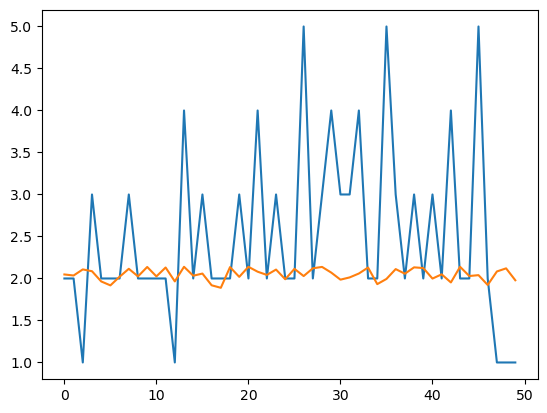

In [878]:
plt.plot(out_test4_res.iloc[:50])
plt.plot(predict_b_b[:50])

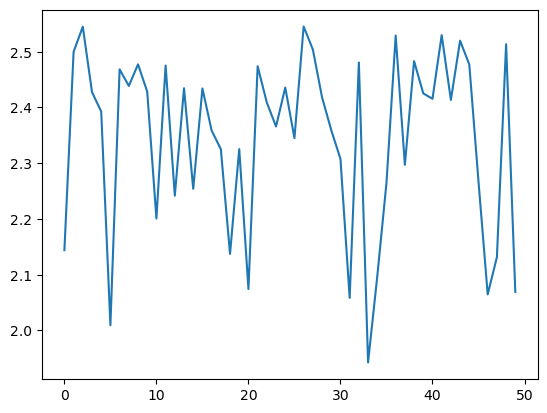

In [795]:
plt.plot(Predict_b1[:50])